In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('health care diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
cols = df.columns
cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
from scipy import stats
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_to_replace:
    mode_value = df[column].mode()
    
    print(mode_value)

0     99
1    100
Name: Glucose, dtype: int64
0    70
Name: BloodPressure, dtype: int64
0    0
Name: SkinThickness, dtype: int64
0    0
Name: Insulin, dtype: int64
0    32.0
Name: BMI, dtype: float64


In [8]:
from collections import Counter

def custom_mode(column):
    mode_count = Counter(column)
    mode_value, mode_frequency = mode_count.most_common(1)[0]
    return mode_value, mode_frequency

columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns_to_replace:
    mode_value, mode_frequency = custom_mode(df[column])
    
    if mode_value == 0:
        non_zero_mode_values = [value for value, frequency in Counter(df[column]).items() if value != 0]
        
        if non_zero_mode_values:
            mode_value = max(non_zero_mode_values, key=Counter(df[column]).get)

    df[column] = df[column].replace(0, mode_value)

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,105,33.6,0.627,50,1
1,1,85,66,29,105,26.6,0.351,31,0
2,8,183,64,32,105,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129140,0.208925,0.104428,0.005204,0.021546,-0.033523,0.544341,0.221898
Glucose,0.129140,1.000000,0.220776,0.196290,0.413180,0.230811,0.138118,0.267926,0.491623
BloodPressure,0.208925,0.220776,1.000000,0.206391,0.029776,0.281276,-0.000478,0.326264,0.163875
SkinThickness,0.104428,0.196290,0.206391,1.000000,0.120690,0.522159,0.077395,0.158825,0.220678
Insulin,0.005204,0.413180,0.029776,0.120690,1.000000,0.186087,0.141959,0.070669,0.193850
BMI,0.021546,0.230811,0.281276,0.522159,0.186087,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.138118,-0.000478,0.077395,0.141959,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.267926,0.326264,0.158825,0.070669,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.491623,0.163875,0.220678,0.193850,0.312249,0.173844,0.238356,1.000000


<AxesSubplot:>

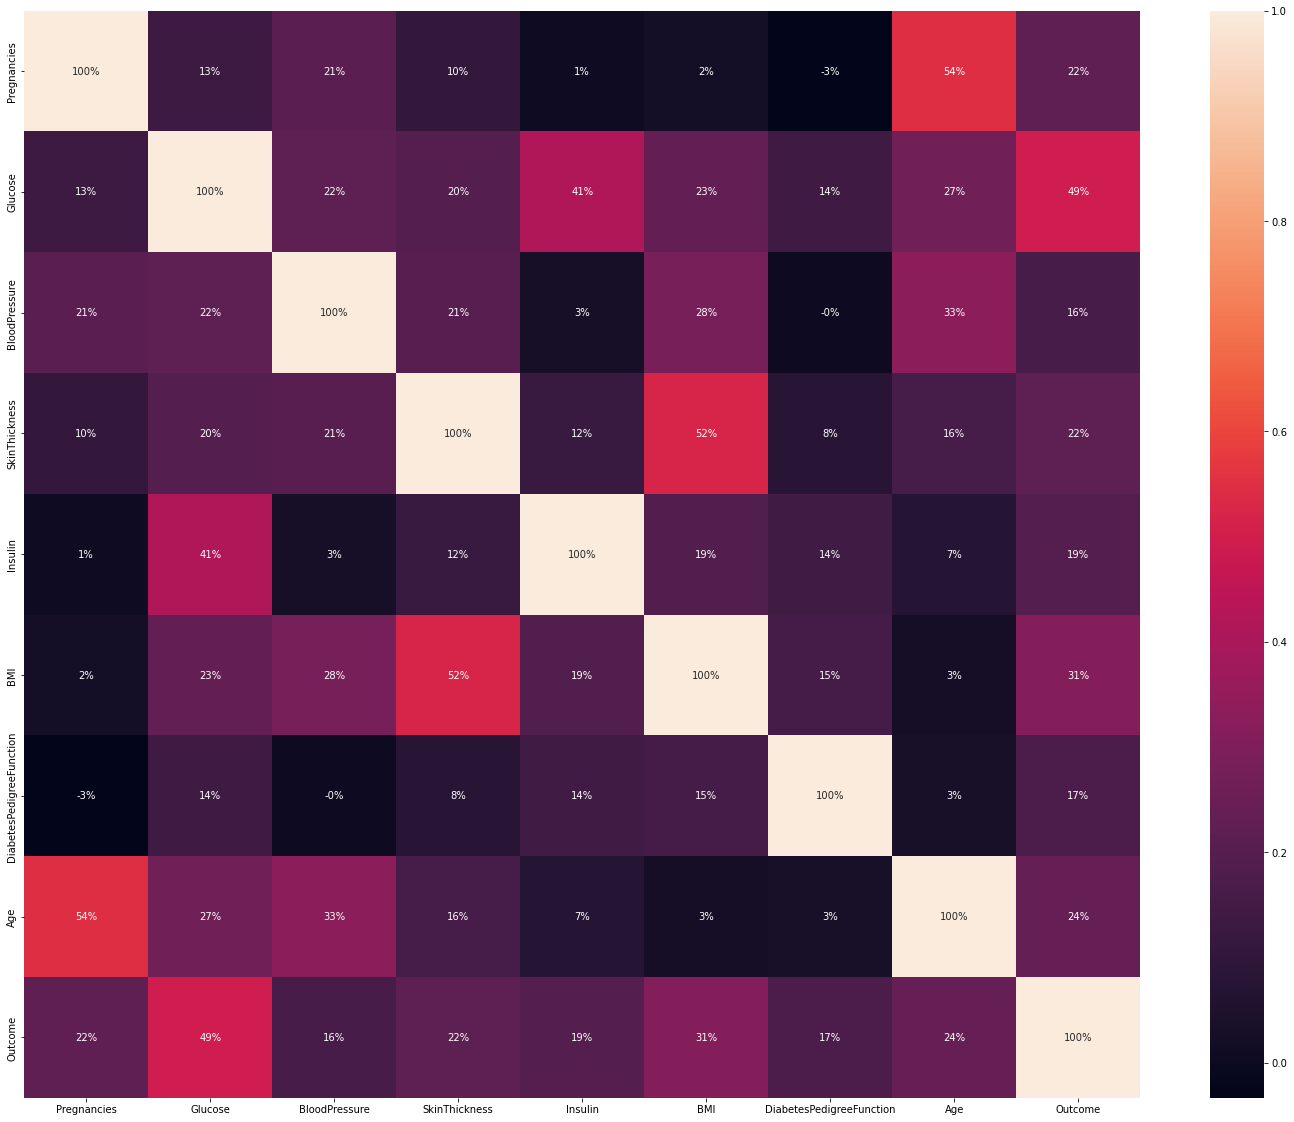

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (25,20))
sns.heatmap(df.corr(),fmt ='.0%',annot = True) 

(array([86., 75., 53., 26., 15.,  9.,  0.,  1.,  1.,  2.]),
 array([0.088 , 0.3212, 0.5544, 0.7876, 1.0208, 1.254 , 1.4872, 1.7204,
        1.9536, 2.1868, 2.42  ]),
 <BarContainer object of 10 artists>)

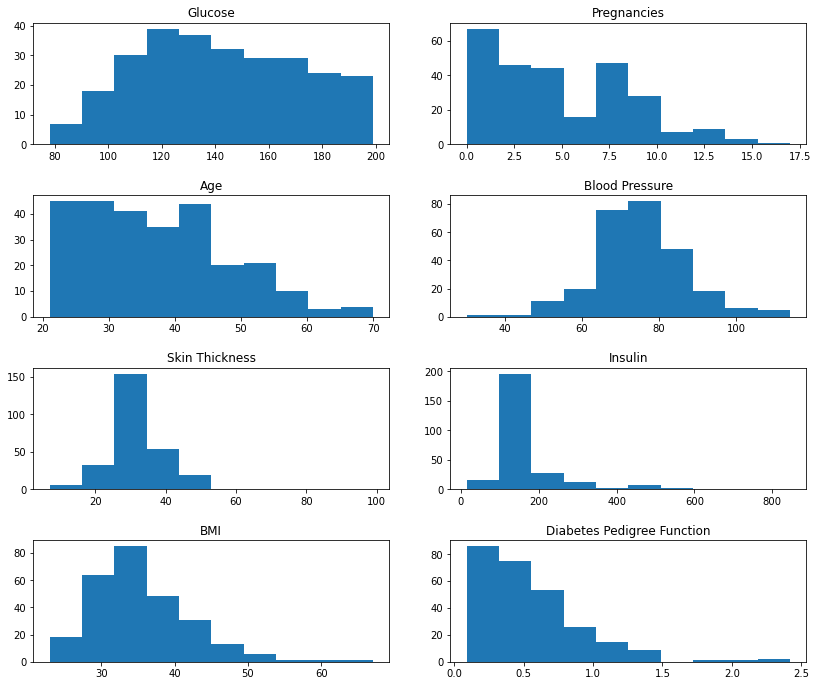

In [12]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
fig.tight_layout(pad=3.0)
ax[0,0].set_title('Glucose')
ax[0,0].hist(df.Glucose[df.Outcome==1]);
ax[0,1].set_title('Pregnancies')
ax[0,1].hist(df.Pregnancies[df.Outcome==1]);
ax[1,0].set_title('Age')
ax[1,0].hist(df.Age[df.Outcome==1]);
ax[1,1].set_title('Blood Pressure')
ax[1,1].hist(df.BloodPressure[df.Outcome==1]);
ax[2,0].set_title('Skin Thickness')
ax[2,0].hist(df.SkinThickness[df.Outcome==1]);
ax[2,1].set_title('Insulin')
ax[2,1].hist(df.Insulin[df.Outcome==1]);
ax[3,0].set_title('BMI')
ax[3,0].hist(df.BMI[df.Outcome==1]);
ax[3,1].set_title('Diabetes Pedigree Function')
ax[3,1].hist(df.DiabetesPedigreeFunction[df.Outcome==1])

In [13]:
df.to_csv("RESUME_HEALTH_FIN_unfil1.csv", index=False)

In [14]:
df = df[df['Insulin']<=370]

In [15]:
df = df[df['BMI']<=55]

In [16]:
df = df[df['Pregnancies']<=10]

C:\Users\aksha\Downloads\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

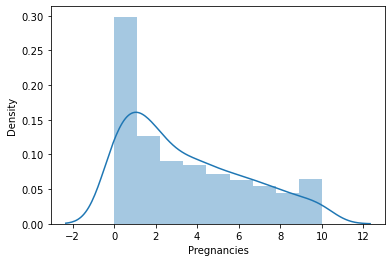

In [17]:
sns.distplot(df['Pregnancies'])

C:\Users\aksha\Downloads\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

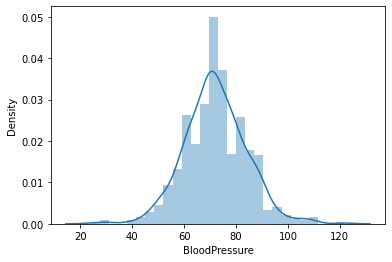

In [18]:
sns.distplot(df['BloodPressure'])

In [19]:
df = df[df['BloodPressure']>=35]

In [20]:
df = df[df['BloodPressure']<=110]

C:\Users\aksha\Downloads\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

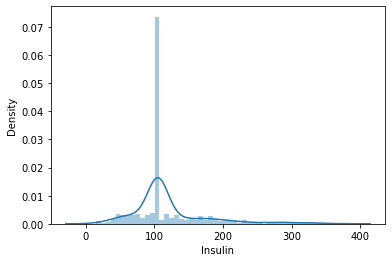

In [21]:
sns.distplot(df['Insulin'])

In [22]:
df = df[df['Insulin']<=250]

C:\Users\aksha\Downloads\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>

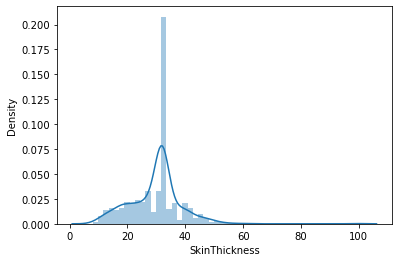

In [23]:
sns.distplot(df['SkinThickness'])

In [24]:
df = df[df['SkinThickness']<=65]

In [25]:
df.shape

(673, 9)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

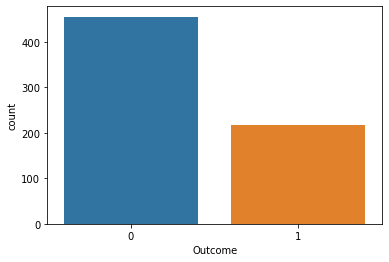

In [26]:
sns.countplot(data=df,x='Outcome')

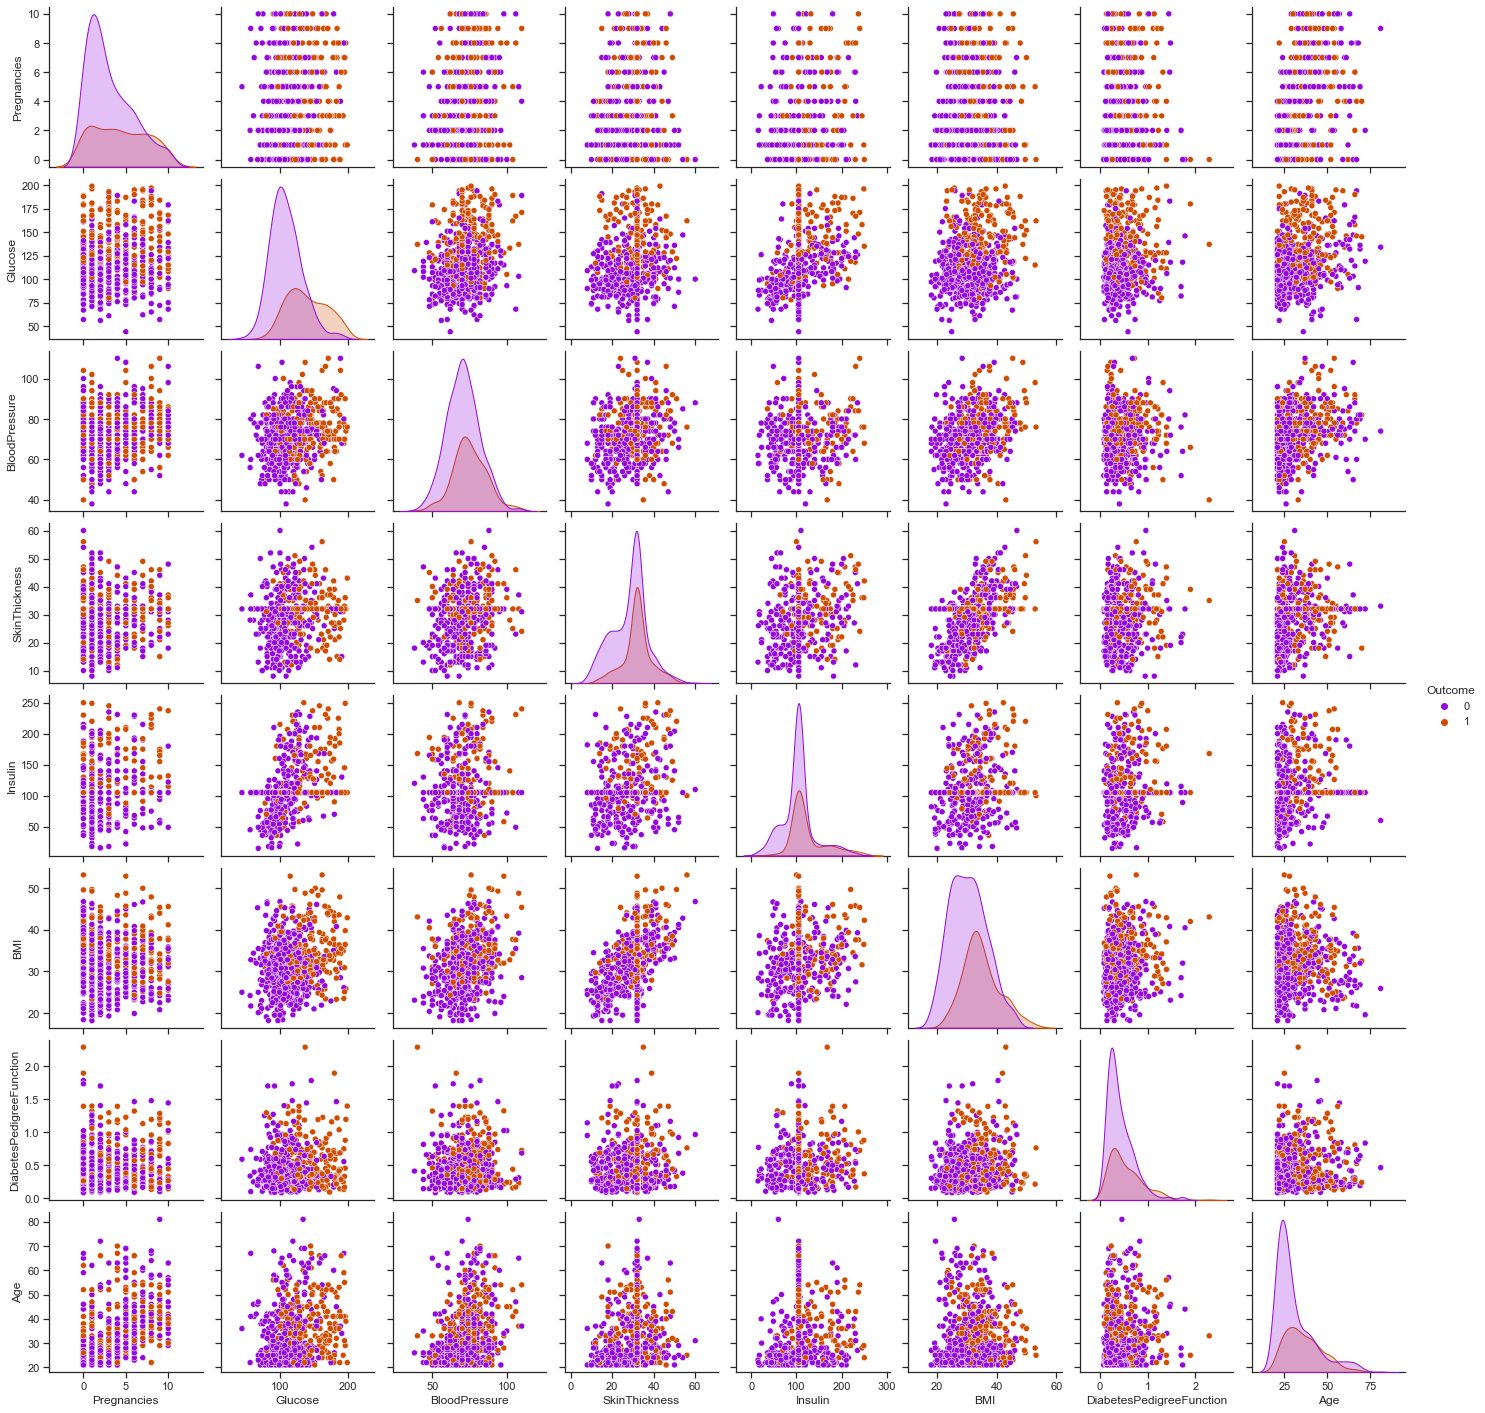

In [27]:

sns.set(style="ticks", color_codes=True)
sns.pairplot(df,hue='Outcome',palette='gnuplot');

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_df = scaler.fit_transform(df)
df = pd.DataFrame(new_df, columns=df.columns)

In [29]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.6,0.670968,0.472222,0.519231,0.382979,0.440000,0.248416,0.483333,1.0
1,0.1,0.264516,0.388889,0.403846,0.382979,0.240000,0.123529,0.166667,0.0
2,0.8,0.896774,0.361111,0.461538,0.382979,0.145714,0.268778,0.183333,1.0
3,0.1,0.290323,0.388889,0.288462,0.336170,0.282857,0.040271,0.000000,0.0
4,0.0,0.600000,0.027778,0.519231,0.651064,0.711429,1.000000,0.200000,1.0


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df.drop('Outcome',axis = 1)

In [32]:
y = df['Outcome']

In [33]:
y = np.ravel(y)

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
predict1 = knn.predict(X_test)
predict1

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.])

In [36]:
count_missclassified1 = (y_test!=predict1).sum()
count_missclassified1

26

In [37]:
from sklearn import metrics
accuracy1 = metrics.accuracy_score(y_test,predict1)
accuracy1*100

80.74074074074075

In [38]:
c_f1 = metrics.classification_report(y_test,predict1)
print(c_f1)

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87        99
         1.0       0.64      0.64      0.64        36

    accuracy                           0.81       135
   macro avg       0.75      0.75      0.75       135
weighted avg       0.81      0.81      0.81       135



<AxesSubplot:title={'center':'CONFUSION_MATRIX'}>

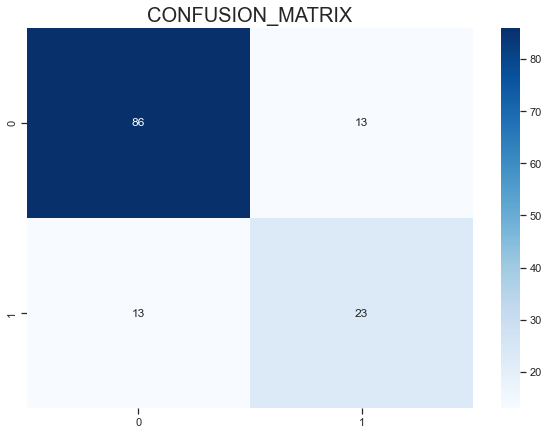

In [39]:

cf = metrics.confusion_matrix(y_test,predict1)
plt.figure(figsize =(10,7))
plt.title("CONFUSION_MATRIX",fontsize = 20)
sns.heatmap(cf,cmap = 'Blues',fmt = 'g',annot = True)

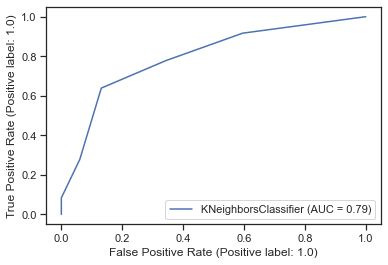

In [40]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(knn,X_test,y_test)

In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
predict2 = lr.predict(X_test)
predict2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.])

In [42]:
count_missclassified2 = (y_test!=predict2).sum()
count_missclassified2

31

In [43]:
accuracy2 = metrics.accuracy_score(y_test,predict2)
accuracy2*100

77.03703703703704

In [44]:
c_r2 = metrics.classification_report(y_test,predict2)
print(c_r2)

              precision    recall  f1-score   support

         0.0       0.83      0.86      0.85        99
         1.0       0.58      0.53      0.55        36

    accuracy                           0.77       135
   macro avg       0.70      0.69      0.70       135
weighted avg       0.76      0.77      0.77       135



<AxesSubplot:title={'center':'CONFUSION_MATRIX'}>

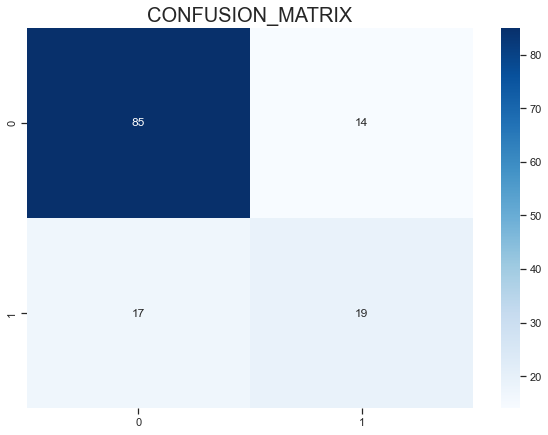

In [45]:
cf = metrics.confusion_matrix(y_test,predict2)
plt.figure(figsize =(10,7))
plt.title("CONFUSION_MATRIX",fontsize = 20)
sns.heatmap(cf,cmap = 'Blues',fmt = 'g',annot = True)

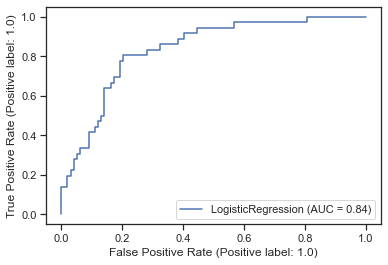

In [46]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(lr,X_test,y_test)

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=24)
rf.fit(X_train, y_train)
predict3 = rf.predict(X_test)
predict3

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.])

In [48]:
count_missclassified3 = (y_test!=predict3).sum()
count_missclassified3

30

In [49]:
accuracy3 = metrics.accuracy_score(y_test,predict3)
accuracy3*100

77.77777777777779

In [50]:
c_r3 = metrics.classification_report(y_test,predict3)
print(c_r3)

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85        99
         1.0       0.58      0.58      0.58        36

    accuracy                           0.78       135
   macro avg       0.72      0.72      0.72       135
weighted avg       0.78      0.78      0.78       135



<AxesSubplot:title={'center':'CONFUSION_MATRIX'}>

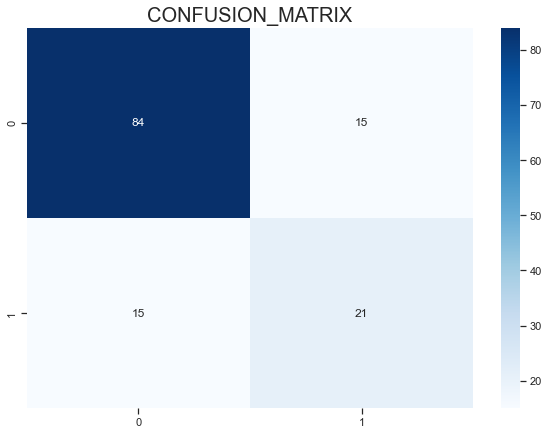

In [51]:
cf = metrics.confusion_matrix(y_test,predict3)
plt.figure(figsize =(10,7))
plt.title("CONFUSION_MATRIX",fontsize = 20)
sns.heatmap(cf,cmap = 'Blues',fmt = 'g',annot = True)

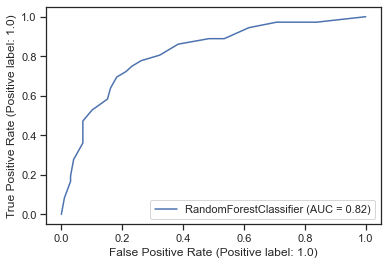

In [52]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(rf,X_test,y_test)

In [53]:
import xgboost as xgb
xg = xgb.XGBClassifier()
xg.fit(X_train, y_train)
predict4 = xg.predict(X_test)
predict4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0])

In [54]:
count_missclassified4 = (y_test != predict4).sum()
count_missclassified4

28

In [55]:
accuracy4 = metrics.accuracy_score(y_test,predict4)
accuracy4*100

79.25925925925927

In [56]:
c_r4 = metrics.classification_report(y_test,predict4)
print(c_r4)

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86        99
         1.0       0.62      0.56      0.59        36

    accuracy                           0.79       135
   macro avg       0.73      0.72      0.72       135
weighted avg       0.79      0.79      0.79       135



<AxesSubplot:title={'center':'CONFUSION_MATRIX'}>

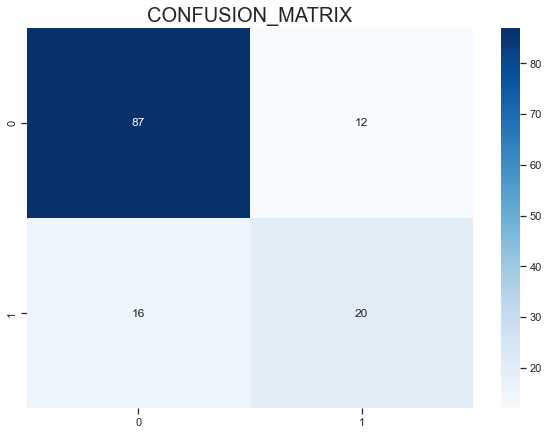

In [57]:
cf = metrics.confusion_matrix(y_test,predict4)
plt.figure(figsize =(10,7))
plt.title("CONFUSION_MATRIX",fontsize = 20)
sns.heatmap(cf,cmap = 'Blues',fmt = 'g',annot = True)

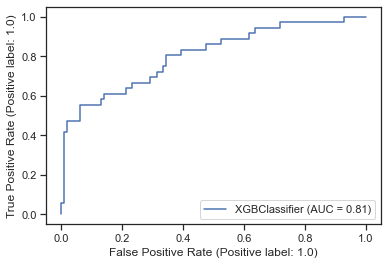

In [58]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(xg,X_test,y_test)

In [59]:
from sklearn import svm 
#svc-> classificational algorithm

model = svm.SVC(probability=True)
model.fit(X_train,y_train)
predict5=model.predict(X_test)
predict5

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.])

In [60]:
count_missclassified5 = (y_test != predict5).sum()
count_missclassified5

29

In [61]:
accuracy5=metrics.accuracy_score(y_test,predict5)
accuracy5*100

78.51851851851852

In [62]:
c_r5 = metrics.classification_report(y_test,predict5)
print(c_r5)

              precision    recall  f1-score   support

         0.0       0.84      0.87      0.86        99
         1.0       0.61      0.56      0.58        36

    accuracy                           0.79       135
   macro avg       0.72      0.71      0.72       135
weighted avg       0.78      0.79      0.78       135



<AxesSubplot:title={'center':'CONFUSION_MATRIX'}>

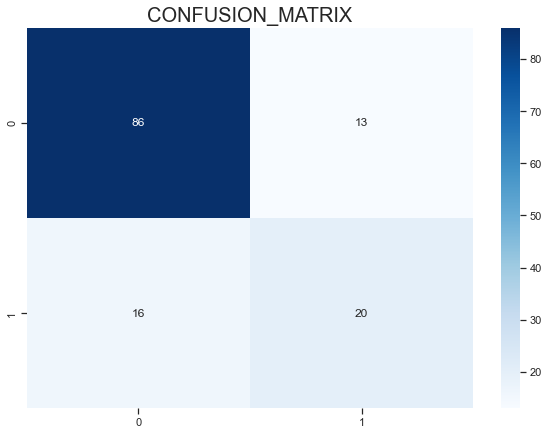

In [63]:
cf = metrics.confusion_matrix(y_test,predict5)
plt.figure(figsize =(10,7))
plt.title("CONFUSION_MATRIX",fontsize = 20)
sns.heatmap(cf,cmap = 'Blues',fmt = 'g',annot = True)

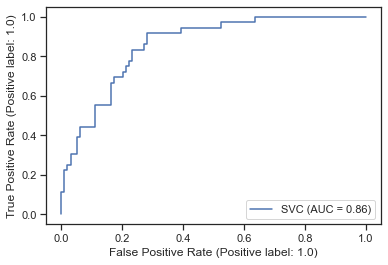

In [64]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model,X_test,y_test)

In [65]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=1,min_samples_split=5)
dtree.fit(X_train,y_train)
predict6 = dtree.predict(X_test)
predict6

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.])

In [66]:
count_missclassified6 = (y_test != predict6).sum()
count_missclassified6

29

In [67]:
accuracy6 = metrics.accuracy_score(y_test,predict6)
accuracy6*100

78.51851851851852

<AxesSubplot:title={'center':'CONFUSION_MATRIX'}>

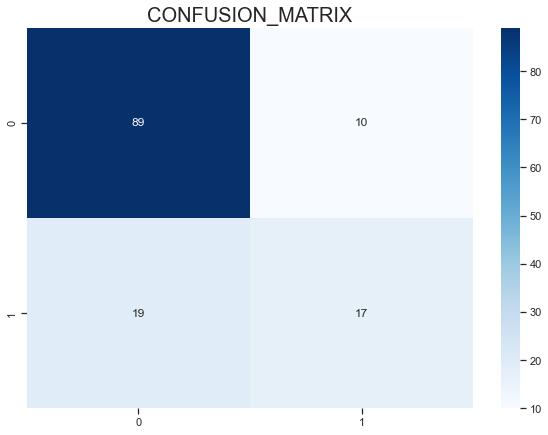

In [68]:
cf = metrics.confusion_matrix(y_test,predict6)
plt.figure(figsize =(10,7))
plt.title("CONFUSION_MATRIX",fontsize = 20)
sns.heatmap(cf,cmap = 'Blues',fmt = 'g',annot = True)

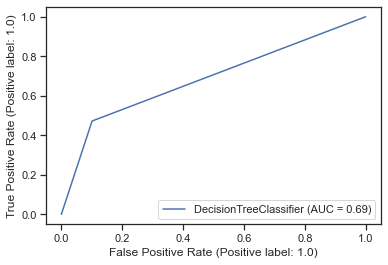

In [69]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(dtree,X_test,y_test)

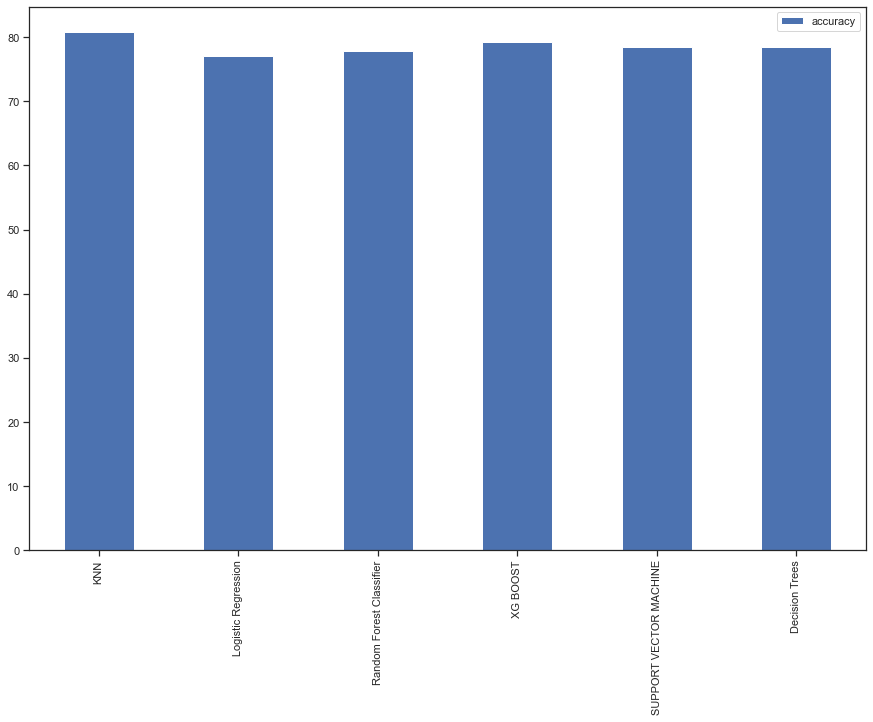

In [70]:
model_compare = pd.DataFrame({"KNN":accuracy1*100,
"Logistic Regression":accuracy2*100,
"Random Forest Classifier":accuracy3*100,
"XG BOOST":accuracy4*100,
"SUPPORT VECTOR MACHINE":accuracy5*100,
"Decision Trees":accuracy6*100,},
index=["accuracy"])
model_compare.T.plot.bar(figsize=(15,10));

In [71]:
from sklearn.model_selection import GridSearchCV
lr_params = [{'C': np.logspace(-4,4,30), "solver":["liblinear"]}]
clf = GridSearchCV(lr,lr_params,cv = 5,verbose=True) #grid search cv model creation 
clf.fit(X_train,y_train)
score=clf.score(X_test,y_test)
print(score*100)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
78.51851851851852


In [72]:
y_prediction=clf.predict(X_test)
y_prediction

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.])

In [73]:
count_missclassifiedF = (y_test != y_prediction).sum()
count_missclassifiedF

29

<AxesSubplot:title={'center':'CONFUSION_MATRIX'}>

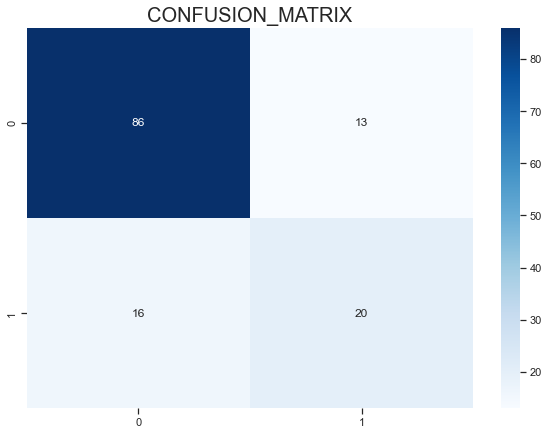

In [74]:
cf = metrics.confusion_matrix(y_test,y_prediction)
plt.figure(figsize =(10,7))
plt.title("CONFUSION_MATRIX",fontsize = 20)
sns.heatmap(cf,cmap = 'Blues',fmt = 'g',annot = True)

In [75]:
df.to_csv("RESUME_HEALTH_FIN.csv", index=False)